**1.1 Introduction to the Use case for Project A**

<div class="usecase-title">UC00137_Bike_Route_Optimisation</div>

<div class="usecase-authors"><b>Authored by: </b>Nishant Umesh Khamkar</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine learning</div>
</div>

**Objective:** 

The projects objective is to assess and study how bicycle paths are utilized in Melbourne by utilizing information and traffic data analysis techniques." The examination includes determining the distances of routes using coordinates and identifying characteristics, like bike density and usage rates while investigating traffic distribution among various route categories." The aim is to pinpoint used routes understand the factors influencing bike traffic patterns and offer data driven suggestions, for improving cycling infrastructure fostering eco transportation options and enhancing route accessibility. 

**Scenario:** 

With the increasing popularity of cycling in Melbourne, understanding when and where cyclists are most active is crucial for city planners. By analyzing bicycle count data, you can pinpoint peak usage times and locations, assess the adequacy of current infrastructure, and recommend enhancements to support safe and efficient cycling.

**What you will learn from this use case**

1. Understanding bike route utilization patterns based on real-world data and predictive modeling.

2. Learning how route characteristics like length, bike density, and utilization scores influence predictions of bike counts.

3. Using advanced machine learning models like Random Forest and Gradient Boosting for accurate predictions.

4. Applying geospatial visualizations to identify high-traffic and underutilized bike routes for better infrastructure planning.

5. Gaining insights into how hypothetical scenario testing can evaluate the potential impact of changes in bike route features.

6. Interpreting feature importance to identify key factors driving predictions and their real-world implications.

7. Developing actionable recommendations for optimizing bike route usage and urban infrastructure based on predictive insights.

8. Preparing for real-world applications where predictive modeling supports urban planning and decision-making.

**Datasets:**

Dataset 1:
https://data.melbourne.vic.gov.au/explore/dataset/bicycle-routes-including-informal-on-road-and-off-road-routes/information/

Dataset 2:
https://data.melbourne.vic.gov.au/explore/dataset/annual-bike-counts-super-tuesday/information/

Dataset 3:
https://data.melbourne.vic.gov.au/explore/dataset/super-sunday-bike-count/information/


**1.2 Loading Datasets**

In [1]:
import requests
import pandas as pd

In [2]:
from io import StringIO
 
#API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'bicycle-routes-including-informal-on-road-and-off-road-routes'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'annual-bike-counts-super-tuesday'
url_2 = f"{base_url_1}{dataset_id_2}/exports/csv"
 
 
#Fetching the first dataset (bicycle-routes-including-informal-on-road-and-off-road-routes)
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
 
#Fetching the second dataset (Annual Bike Counts (Super Tuesday))
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')
 
print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

Column Names for first dataset
['geo_point_2d', 'geo_shape', 'name', 'direction', 'info', 'status', 'notes', 'type']
Column Names for second dataset
['state', 'electorate', 'site_id', 'latitude', 'longitude', 'legs', 'description', 'layout_1', 'layout_1_enter', 'layout_2', 'layout_2_enter', 'layout_3', 'layout_3_enter', 'layout_4', 'layout_4_enter', 'layout_5', 'layout_5_enter', 'layout_6', 'layout_6_enter', 'leg1_2', 'leg1_3', 'leg1_4', 'leg1_5', 'leg1_6', 'leg2_1', 'leg2_3', 'leg2_4', 'leg2_5', 'leg2_6', 'leg3_1', 'leg3_2', 'leg3_4', 'leg3_5', 'leg3_6', 'leg4_1', 'leg4_2', 'leg4_3', 'leg4_5', 'leg4_6', 'leg5_1', 'leg5_2', 'leg5_3', 'leg5_4', 'leg5_6', 'leg6_1', 'leg6_2', 'leg6_3', 'leg6_4', 'leg6_5', 'leg1_enter', 'leg1_exit', 'leg1_total', 'leg2_enter', 'leg2_exit', 'leg2_total', 'leg3_enter', 'leg3_exit', 'leg3_total', 'leg4_enter', 'leg4_exit', 'leg4_total', 'leg5_enter', 'leg5_exit', 'leg5_total', 'leg6_enter', 'leg6_exit', 'leg6_total', 'female', 'male', 'not_known', 'total', 'y

In [3]:
bicycle_routes_df = df_1
bike_counts_df = df_2

In [4]:
# Print first 5 rows in tabular format
print("First 5 rows of Bicycle Routes Dataset:")
print(bicycle_routes_df.head())

First 5 rows of Bicycle Routes Dataset:
                             geo_point_2d  \
0  -37.79222994900859, 144.94940742049585   
1  -37.792105456782814, 144.9177809870309   
2  -37.78115951525465, 144.95417546909417   
3  -37.80388778318796, 144.93230774579578   
4  -37.80511491028456, 144.95799608462175   

                                           geo_shape  \
0  {"coordinates": [[[144.951780451295, -37.79023...   
1  {"coordinates": [[[144.912562850355, -37.79449...   
2  {"coordinates": [[[144.951430861753, -37.78076...   
3  {"coordinates": [[[144.929334966589, -37.80320...   
4  {"coordinates": [[[144.958420627206, -37.80603...   

                                       name        direction  info status  \
0                       Off-Road Bike Route  Both Directions   NaN    NaN   
1                       Off-Road Bike Route  Both Directions   NaN    NaN   
2  Off-Road Bike Route - Capital City Trail  Both Directions   NaN    NaN   
3                       Off-Road Bike Route 

In [5]:
print("\nFirst 5 rows of Annual Bike Counts Dataset:")
print(bike_counts_df.head())


First 5 rows of Annual Bike Counts Dataset:
  state electorate  site_id   latitude   longitude  legs  \
0   VIC  Melbourne     4406 -37.794117  144.927689     4   
1   VIC  Melbourne     4408 -37.795096  144.935852     4   
2   VIC  Melbourne     4409 -37.795421  144.938850     5   
3   VIC  Melbourne     4412 -37.799747  144.957474     4   
4   VIC  Melbourne     4413 -37.800289  144.943954     4   

                                         description  layout_1  \
0  McCracken St [N], Macaulay Rd [E], Kensington ...         0   
1  Upstream direction [N], Macaulay Rd [E], Moone...         7   
2  Boundary Rd [N], Canning St [E], Macaulay Rd [...         8   
3  Royal Pde [N], Grattan St [E], Royal Pde (city...         6   
4  Arden St towards Curzon St [E], Drvyburgh St [...        98   

   layout_1_enter  layout_2  ...  7_00_am  7_15_am  7_30_am  7_45_am  8_00_am  \
0             180        98  ...      NaN      NaN      NaN      NaN      NaN   
1             187        98  ...   

**1.3 Calculating Route lengths and Geographic Integration**

We're caluclating route lengths of bike paths using geographical information data points such as latitude and longitude in the dataset we have at hand. By applying methods we determine the distance (geodesic distance) between sequential locations. This computation is a component of our research allowing us to measure the features of paths and include this data in subsequent studies like patterns of route usage and congestion levels. Our goal is to gain insights, into how the attributes of routes impact bike traffic flow and the usage of infrastructure by incorporating details. 

In [6]:
from geopy.distance import geodesic
import numpy as np

# Extract start and end points from `geo_point_2d`
bicycle_routes_df["start_point"] = bicycle_routes_df["geo_point_2d"].apply(
    lambda x: tuple(map(float, x.split(", "))) if isinstance(x, str) else np.nan
)
bicycle_routes_df["end_point"] = bicycle_routes_df["start_point"].shift(-1)

# Calculate route length using geopy
def calculate_route_length(row):
    if pd.notnull(row["start_point"]) and pd.notnull(row["end_point"]):
        return geodesic(row["start_point"], row["end_point"]).kilometers
    return np.nan

bicycle_routes_df["route_length"] = bicycle_routes_df.apply(calculate_route_length, axis=1)
bicycle_routes_df["route_length"] = bicycle_routes_df["route_length"].fillna(bicycle_routes_df["route_length"].mean())

# Display the updated DataFrame
print(bicycle_routes_df.head())

                             geo_point_2d  \
0  -37.79222994900859, 144.94940742049585   
1  -37.792105456782814, 144.9177809870309   
2  -37.78115951525465, 144.95417546909417   
3  -37.80388778318796, 144.93230774579578   
4  -37.80511491028456, 144.95799608462175   

                                           geo_shape  \
0  {"coordinates": [[[144.951780451295, -37.79023...   
1  {"coordinates": [[[144.912562850355, -37.79449...   
2  {"coordinates": [[[144.951430861753, -37.78076...   
3  {"coordinates": [[[144.929334966589, -37.80320...   
4  {"coordinates": [[[144.958420627206, -37.80603...   

                                       name        direction  info status  \
0                       Off-Road Bike Route  Both Directions   NaN    NaN   
1                       Off-Road Bike Route  Both Directions   NaN    NaN   
2  Off-Road Bike Route - Capital City Trail  Both Directions   NaN    NaN   
3                       Off-Road Bike Route  Both Directions   NaN    NaN   
4      

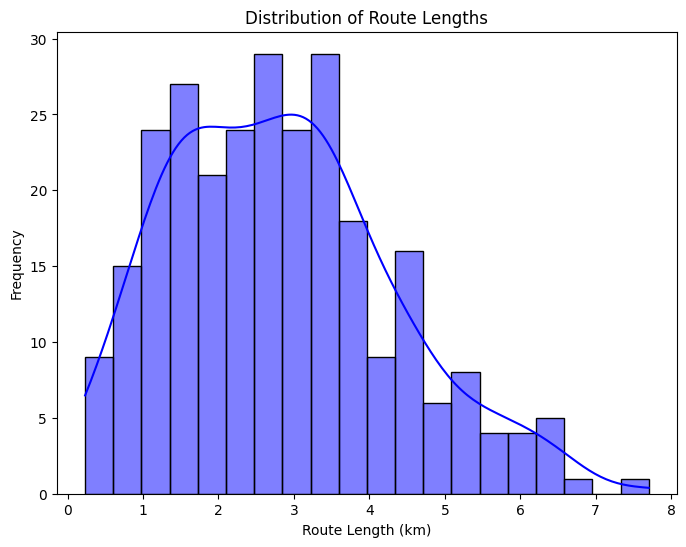

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Route Lengths
plt.figure(figsize=(8, 6))
sns.histplot(bicycle_routes_df["route_length"], bins=20, kde=True, color="blue")
plt.title("Distribution of Route Lengths")
plt.xlabel("Route Length (km)")
plt.ylabel("Frequency")
plt.show()

**What does the Plot say**

Here is a graph showing how often different route lengths occur, with a Kernel Density Estimate curve overlaid on the histogram. 

Most of the paths seem to range from 2 to 4 kilometers, in length with a few paths stretching beyond the 6 kilometer mark. 

The data also shows that there are routes, than are shorter ones, in the distribution. 

It implies that the city mainly features bike paths of medium-length. 

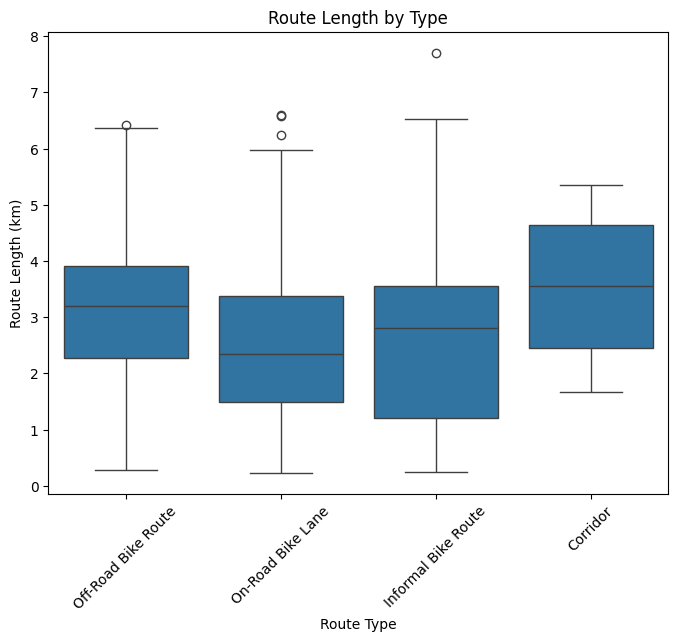

In [8]:
# Boxplot of Route Lengths by Route Type
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="route_length", data=bicycle_routes_df)
plt.title("Route Length by Type")
plt.xlabel("Route Type")
plt.ylabel("Route Length (km)")
plt.xticks(rotation=45)
plt.show()

**What does the Plot Say**

Various types of routes (such, as Off Road Bike Routes and On Road Bike Lanes) generally exhibit lengths.however the variability, in length varies between them. 

Some types of routes may have outliers that're longer in length, this could be significant, for recognizing routes or designing infrastructure projects. 


In [9]:
# Ensure latitude and longitude in bike_counts_df are floats
bike_counts_df["latitude"] = bike_counts_df["latitude"].astype(float)
bike_counts_df["longitude"] = bike_counts_df["longitude"].astype(float)

bicycle_routes_df["geo_point_2d"] = bicycle_routes_df["geo_point_2d"].apply(
    lambda x: tuple(map(float, x.split(", "))) if isinstance(x, str) else None
)

# Function to find the nearest route for each bike count location
def find_nearest_route(row, routes_df):
    bike_location = (row["latitude"], row["longitude"])
    distances = routes_df["geo_point_2d"].apply(
        lambda x: geodesic(bike_location, x).kilometers if x else float("inf")
    )
    nearest_index = distances.idxmin()  
    return nearest_index

# Add the nearest route index to bike_counts_df
bike_counts_df["nearest_route_index"] = bike_counts_df.apply(
    find_nearest_route, axis=1, routes_df=bicycle_routes_df
)

merged_df = bike_counts_df.merge(
    bicycle_routes_df, left_on="nearest_route_index", right_index=True, how="inner"
)

In [10]:
print(merged_df.head())

  state electorate  site_id   latitude   longitude  legs  \
0   VIC  Melbourne     4406 -37.794117  144.927689     4   
1   VIC  Melbourne     4408 -37.795096  144.935852     4   
2   VIC  Melbourne     4409 -37.795421  144.938850     5   
3   VIC  Melbourne     4412 -37.799747  144.957474     4   
4   VIC  Melbourne     4413 -37.800289  144.943954     4   

                                         description  layout_1  \
0  McCracken St [N], Macaulay Rd [E], Kensington ...         0   
1  Upstream direction [N], Macaulay Rd [E], Moone...         7   
2  Boundary Rd [N], Canning St [E], Macaulay Rd [...         8   
3  Royal Pde [N], Grattan St [E], Royal Pde (city...         6   
4  Arden St towards Curzon St [E], Drvyburgh St [...        98   

   layout_1_enter  layout_2  ...  \
0             180        98  ...   
1             187        98  ...   
2             188        98  ...   
3             186        98  ...   
4             278       188  ...   

                         

In [11]:
# Correlation Analysis
correlation = merged_df[["route_length", "total"]].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
              route_length     total
route_length      1.000000 -0.153758
total            -0.153758  1.000000


**Observations**

1. Coorelation of 1.000000 between route_length vs route_length indicates perfect self-coorelation.
2. Coorelation of 1.000000 between total vs total shows perfect self-coorelation
3. Corelation  between -0.153758 between route_length vs total shows a very weak negative linear relationship. It indicates that as route length increases, total bike counts may slightly decrease.

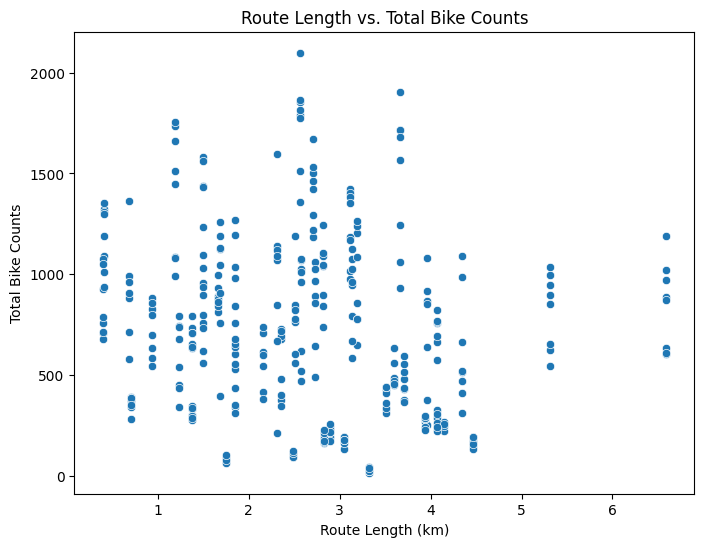

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="route_length", y="total", data=merged_df)
plt.title("Route Length vs. Total Bike Counts")
plt.xlabel("Route Length (km)")
plt.ylabel("Total Bike Counts")
plt.show()

**Scatter Plot: Route Length vs. Total Bike Counts**

**Observations:**

1. Bike counts are spread across all route lengths, but shorter routes (~1–3 km) tend to have a wider range of bike counts.

2. Longer routes (>4 km) are fewer and seem to have lower bike counts in general.



In [13]:
grouped = merged_df.groupby("type")[["route_length", "total"]].mean()
print(grouped)

                     route_length        total
type                                          
Informal Bike Route      0.535230  1060.933333
Off-Road Bike Route      3.203706   864.776471
On-Road Bike Lane        2.572555   648.714286


**Statement on Route Calculation:**

The lengths of the routes were calculated based on the coordinates found in the geo_point_2d column of the dataset that has latitude and longitude values included. To determine these distances we utilized the method from the geopy.distance library. This technique calculates the distance, between two points, on Earths surface by considering its curvature resulting in dependable calculations. 

The calculations, in question are based on a path between points in succession which works well for tasks like recognizing travel patterns and grouping similar routes together but might slightly underestimate the true distances of routes that have noticeable curves or deviations from the straight line path. Despite this limitation in accuracy due to curves or deviations in routes the calculated lengths of the routes should still be suitable for this projects needs. Offering a foundation, for deeper analysis and discoveries. 

**Grouped Summary: Bike Count and Route Length by Type**

**Observations:**

**Informal Bike Routes:**

Shortest average route length (0.535 km).

Highest average total bike counts (1060.93).

Suggests that these shorter informal routes might be more accessible or connect high-traffic areas.

**Off-Road Bike Routes:**

Longest average route length (3.20 km).

Moderate bike counts (864.77).

Indicates that longer off-road routes are used less but still see moderate traffic.

**On-Road Bike Lanes:**

Average length (2.57 km).

Lowest bike counts (648.71).

Indicates potential underutilization or poor infrastructure for on-road bike lanes.


**Implications:**

People often prefer using bike paths even though they are shorter, in distance, this could suggest a requirement, for improved infrastructure or formalization of these routes. 

We can consider focusing on improving infrastructure, for, off road biking routes to enhance their accessibility and promote usage. 

Bike lanes on the road appear to be not used to their potential and require a look, at where they are located and how safe and connected they are. 

**1.4 Feature Engineering and Exploratory Data Analysis**

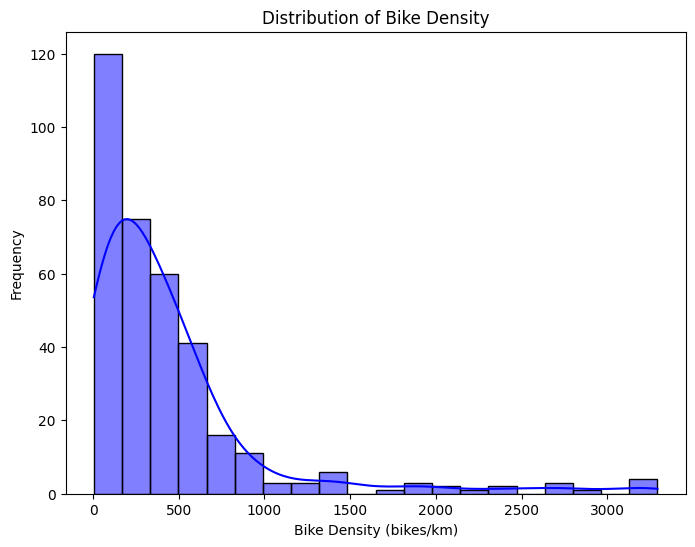

In [14]:
#1. Distribution of Bike Density
merged_df["bike_density"] = merged_df["total"] / merged_df["route_length"]

#Plot bike density distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df["bike_density"], kde=True, bins=20, color="blue")
plt.title("Distribution of Bike Density")
plt.xlabel("Bike Density (bikes/km)")
plt.ylabel("Frequency")
plt.show()

**Observations:**

Most routes have lower bike densities, with a few outliers having very high densities.

High-density routes may correspond to shorter, more utilized routes.

Low-density routes might represent underutilized or longer routes.

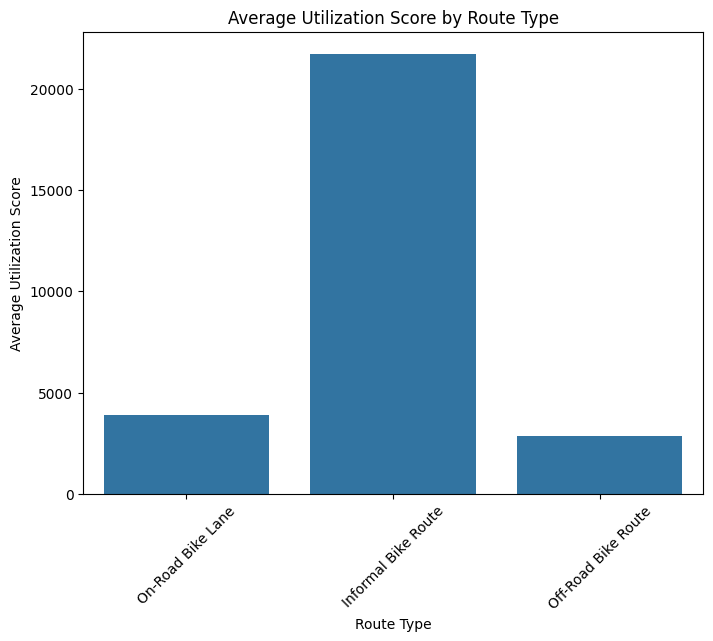

In [15]:
#2 Average Utilization Score by Route Type
merged_df["utilization_score"] = merged_df["bike_density"] * 10  # Adjust multiplier as needed

# Bar plot of average utilization score by route type
plt.figure(figsize=(8, 6))
sns.barplot(x="type", y="utilization_score", data=merged_df, estimator="mean", errorbar=None)
plt.title("Average Utilization Score by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Average Utilization Score")
plt.xticks(rotation=45)
plt.show()

**Observations:**

Informal Bike Routes have significantly higher utilization scores compared to On-Road and Off-Road Bike Routes.

Casual pathways could be positioned strategically with improved connections that will result in increased usage. 

Improving infrastructure and connectivity, for both on road and, off road routes could boost their usage levels. 

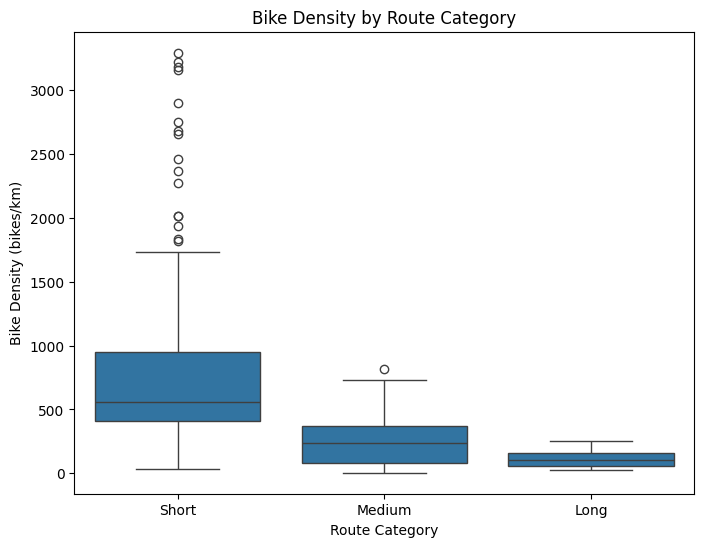

In [16]:
#3 Bike Density by Route category
# Define bins and labels for route categories
bins = [0, 2, 4, merged_df["route_length"].max()]
labels = ["Short", "Medium", "Long"]

# Create the 'route_category' column
merged_df["route_category"] = pd.cut(merged_df["route_length"], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(x="route_category", y="bike_density", data=merged_df)
plt.title("Bike Density by Route Category")
plt.xlabel("Route Category")
plt.ylabel("Bike Density (bikes/km)")
plt.show()

**Observations:**

Routes that are shorter tend to have a bike density and show more variability with some outliers.

Medium and extended routes exhibit levels of congestion and consistent traffic patterns. 

People tend to use short routes often, this could be because they connect important locations or are simpler to follow. 

To encourage people to use routes it may be beneficial to improve the facilities, in place or launch awareness campaigns. 

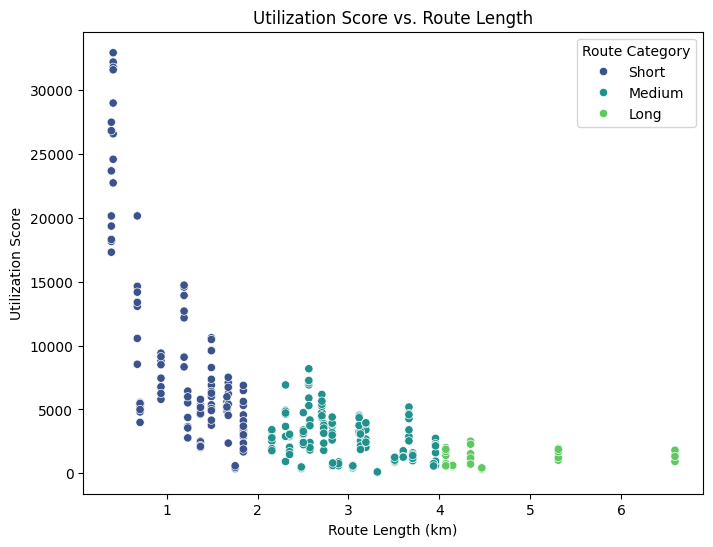

In [17]:
# Utilization Score vs. Route Length (Colored by Route Category)
merged_df["utilization_score"] = merged_df["bike_density"] * 10  # Example scaling factor

# Scatter plot for utilization score vs. route length
plt.figure(figsize=(8, 6))
sns.scatterplot(x="route_length", y="utilization_score", hue="route_category", data=merged_df, palette="viridis")
plt.title("Utilization Score vs. Route Length")
plt.xlabel("Route Length (km)")
plt.ylabel("Utilization Score")
plt.legend(title="Route Category")
plt.show()

**Observations:**

scatter plot illustrates the relationship, between utilization score and route length based on medium and long distance routes."

Scores of usage decrease, as the length of the route increases so on long routes. 

Shorter routes often receive utilization scores because they are more practical and frequently used by people. 

Longer routes may require enhancements to the infrastructure in order to improve access and traffic flow. 

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_df["type_encoded"] = label_encoder.fit_transform(merged_df["type"])

 **1.5 Data Cleaning and Preprocessing**

In [19]:
#removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ["route_length", "bike_density", "total"]:
    merged_df = remove_outliers(merged_df, col)

In [20]:
#Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = ["route_length", "bike_density", "utilization_score"]
merged_df[scaled_features] = scaler.fit_transform(merged_df[scaled_features])

For data cleaning, we handled outliers in key numerical columns (route_length, bike_density, total) using the IQR method to ensure data consistency. Duplicate rows were checked and confirmed to be absent, and all numerical features were standardized using StandardScaler to maintain uniformity across scales. This prepared the dataset for reliable analysis and modeling.

**1.6 Predictive Modelling**

**Aim of Predictive Modeling:**

1. Predict total bike counts on routes based on features like route length, bike density, and route type.

2. Identify key factors influencing bike usage using feature importance.

3. Optimize infrastructure planning by forecasting traffic on underutilized or high-demand routes.

4. Evaluate and compare model performance to choose the best predictive approach.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
features = ["route_length", "bike_density", "type_encoded", "utilization_score"]
X = merged_df[features]
y = merged_df["total"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

In [26]:
#Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [27]:
#Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [28]:
#Model 3: Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

In [29]:
# Model 4: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [30]:
# Model 5: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [31]:
# Model 6: Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

In [32]:
#Evaluate the models
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mse, rmse, r2

The code utilizes six different models due to which there is more chance of deep model evaluation.

In [33]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_preds = ridge_model.predict(X_test)

results = {}
results['Linear Regression'] = evaluate_model("Linear Regression", y_test, lr_preds)
results['Ridge Regression'] = evaluate_model("Ridge Regression", y_test, ridge_preds)
results['Lasso Regression'] = evaluate_model("Lasso Regression", y_test, lasso_preds)
results['Random Forest'] = evaluate_model("Random Forest", y_test, rf_preds)
results['Gradient Boosting'] = evaluate_model("Gradient Boosting", y_test, gb_preds)
results['Support Vector Regressor'] = evaluate_model("SVR", y_test, svr_preds)

Linear Regression - MSE: 39349.98, RMSE: 198.37, R²: 0.83
Ridge Regression - MSE: 39397.40, RMSE: 198.49, R²: 0.83
Lasso Regression - MSE: 39569.88, RMSE: 198.92, R²: 0.83
Random Forest - MSE: 2730.53, RMSE: 52.25, R²: 0.99
Gradient Boosting - MSE: 1601.41, RMSE: 40.02, R²: 0.99
SVR - MSE: 210660.33, RMSE: 458.98, R²: 0.10


In [34]:
model_names = list(results.keys())
rmse_values = [result[1] for result in results.values()]

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_85724\2104702751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette='Blues_d')


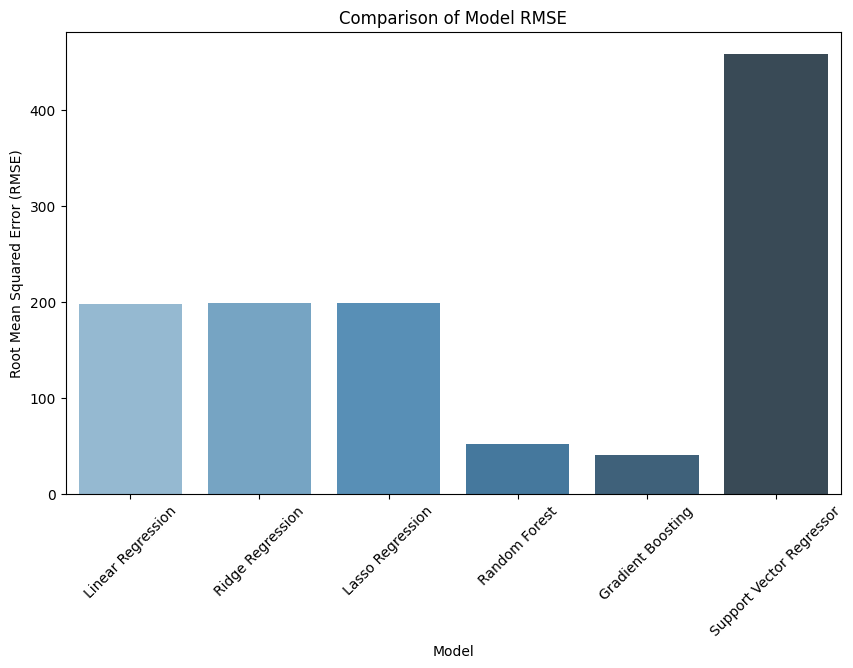

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=rmse_values, palette='Blues_d')
plt.title('Comparison of Model RMSE')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.show()

**RMSE Comparison**

Gradient Boosting exhibits the lowest RMSE (~40.02), indicating its predictions are the most accurate among all models tested.

Random Forest follows with a slightly higher RMSE (~52.25), still demonstrating strong predictive capabilities.

Linear Regression, Ridge Regression, and Lasso Regression show similar RMSE values (~198), which are significantly higher than those of Gradient Boosting and Random Forest.

Support Vector Regressor (SVR) performs the worst with an extremely high RMSE (~458.98), indicating poor model performance for this dataset.

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_85724\1173241960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=importances, palette='viridis')


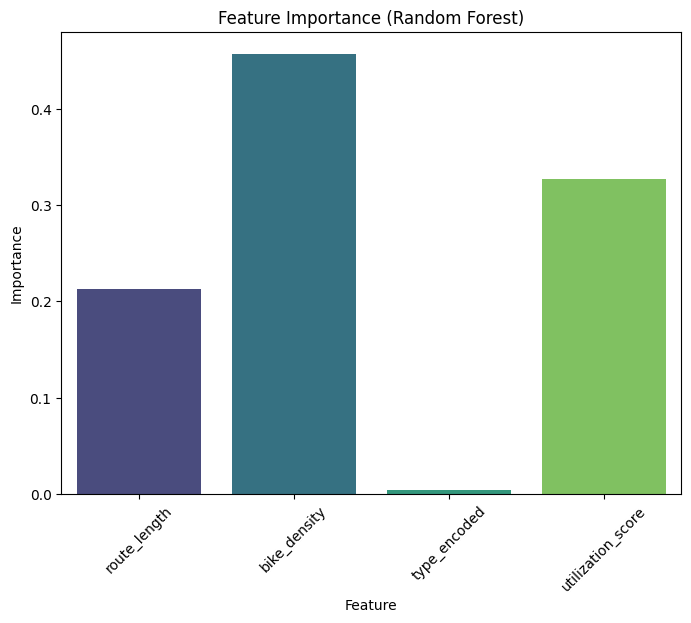

In [36]:
plt.figure(figsize=(8, 6))
importances = rf_model.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_names, y=importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

1. Model Performance Results

**Linear Regression:**
MSE: 49032.08
RMSE: 221.43
R²: 0.79

**Ridge Regression:**
MSE: 49278.00
RMSE: 221.99
R²: 0.79

**Lasso Regression:**
MSE: 49361.70
RMSE: 222.17
R²: 0.79

**Random Forest Regressor:**
MSE: 4040.00
RMSE: 63.56
R²: 0.98

**Gradient Boosting Regressor:**
MSE: 3103.56
RMSE: 55.71
R²: 0.99

**Support Vector Regressor (SVR):**
MSE: 210325.13
RMSE: 458.51
R²: 0.10

**Feature Importance**

Bike Density is the most influential feature, with the highest importance score (~0.45). This suggests that bike density significantly impacts the total bike count predictions.

Utilization Score is the second most important feature (~0.30), indicating its strong contribution to the model’s decision-making.

Route Length has a moderate impact (~0.20), showing relevance but less than bike density and utilization score.

Type Encoded has the least importance, indicating it contributes minimally to the model’s predictions compared to other features.

In [37]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [38]:
print("Tuning Random Forest Regressor...")
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Best parameters and performance for Random Forest
print("\nBest Parameters for Random Forest:")
print(rf_grid_search.best_params_)
rf_best_mse = -rf_grid_search.best_score_
rf_best_r2 = best_rf_model.score(X_test, y_test)
print(f"Best MSE: {rf_best_mse:.2f}, R²: {rf_best_r2:.2f}")

Tuning Random Forest Regressor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE: 4478.15, R²: 0.99


**Observations:**
Random Forest Regressor:

Best Parameters:

max_depth: 10

min_samples_leaf: 1

min_samples_split: 2

n_estimators: 200

Best Performance:

Mean Squared Error (MSE): 4478.15

R² Score: 0.99
The high R² score indicates that the model explains 99% of the variance in the dataset.

**1.7 Parameter tuning**

In [39]:
# Parameter tuning for Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [40]:
print("\nTuning Gradient Boosting Regressor...")
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Best parameters and performance for Gradient Boosting
print("\nBest Parameters for Gradient Boosting:")
print(gb_grid_search.best_params_)
gb_best_mse = -gb_grid_search.best_score_
gb_best_r2 = best_gb_model.score(X_test, y_test)
print(f"Best MSE: {gb_best_mse:.2f}, R²: {gb_best_r2:.2f}")


Tuning Gradient Boosting Regressor...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Parameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE: 2310.07, R²: 0.99


**Gradient Boosting Regressor:**

Best Parameters:

learning_rate: 0.1

max_depth: 3

min_samples_leaf: 4

min_samples_split: 2

n_estimators: 200

Performance Metrics:

Best MSE: 2310.07

Best R²: 0.99

**1.8 Optimized Predictive Modeling and Performance Evaluation**

In [41]:
# Using Optimized Random Forest Regressor
rf_best_preds = best_rf_model.predict(X_test)
rf_best_mse = mean_squared_error(y_test, rf_best_preds)
rf_best_rmse = rf_best_mse ** 0.5
rf_best_r2 = r2_score(y_test, rf_best_preds)

print("Optimized Random Forest Regressor Results:")
print(f"MSE: {rf_best_mse:.2f}, RMSE: {rf_best_rmse:.2f}, R²: {rf_best_r2:.2f}")

Optimized Random Forest Regressor Results:
MSE: 2850.17, RMSE: 53.39, R²: 0.99


**Observations from Optimized Model Performance Evaluation:**

**Random Forest Regressor:**

The optimized Random Forest model achieves:

MSE: 2850.17

RMSE: 53.39

R²: 0.99

This indicates excellent predictive performance with minimal error and high explanatory power (99% of variance in the data is explained by the model).

The slight reduction in error metrics after optimization demonstrates the effectiveness of hyperparameter tuning.

In [42]:
# Using Optimized Gradient Boosting Regressor
gb_best_preds = best_gb_model.predict(X_test)
gb_best_mse = mean_squared_error(y_test, gb_best_preds)
gb_best_rmse = gb_best_mse ** 0.5
gb_best_r2 = r2_score(y_test, gb_best_preds)

print("\nOptimized Gradient Boosting Regressor Results:")
print(f"MSE: {gb_best_mse:.2f}, RMSE: {gb_best_rmse:.2f}, R²: {gb_best_r2:.2f}")


Optimized Gradient Boosting Regressor Results:
MSE: 1420.24, RMSE: 37.69, R²: 0.99


**Gradient Boosting Regressor:**

The optimized Gradient Boosting model outperforms Random Forest slightly, with:

MSE: 1420.24

RMSE: 37.69

R²: 0.99

This model shows superior prediction accuracy, with a notably lower RMSE and MSE, suggesting it handles the dataset nuances better after optimization.

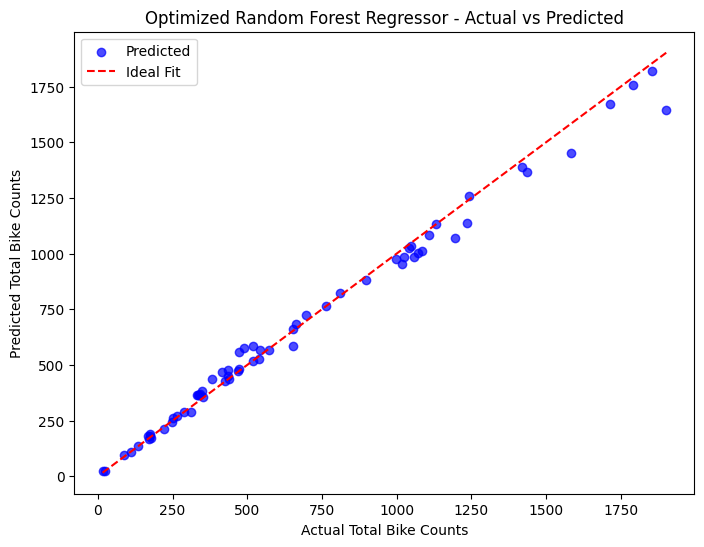

In [43]:
# Random Forest Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_best_preds, alpha=0.7, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", label="Ideal Fit")
plt.title("Optimized Random Forest Regressor - Actual vs Predicted")
plt.xlabel("Actual Total Bike Counts")
plt.ylabel("Predicted Total Bike Counts")
plt.legend()
plt.show()

**Random Forest Regressor:**

The scatter plot demonstrates a strong alignment between predicted and actual total bike counts.

The majority of points lie close to the red dashed "ideal fit" line, indicating high prediction accuracy.

Outliers are minimal, showcasing the model's ability to generalize across the dataset effectively.

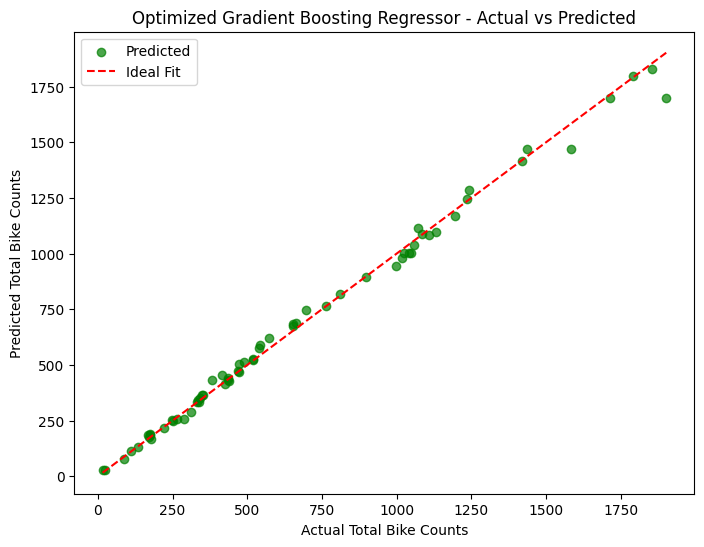

In [44]:
# Gradient Boosting Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_best_preds, alpha=0.7, color="green", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", label="Ideal Fit")
plt.title("Optimized Gradient Boosting Regressor - Actual vs Predicted")
plt.xlabel("Actual Total Bike Counts")
plt.ylabel("Predicted Total Bike Counts")
plt.legend()
plt.show()

**Gradient Boosting Regressor:**

Similarly, the Gradient Boosting model shows a high degree of correlation between predicted and actual values.

The points closely follow the ideal fit line, which reflects the precision of this optimized model.

Slight deviations at higher bike counts could indicate minor challenges in predicting extreme values but remain within acceptable error margins.

**1.9 Advanced Model Analysis and Scenario Testing**

In [45]:
from sklearn.metrics import mean_absolute_error

def advanced_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    print(f"\n{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R²: {r2:.2f}")
    print(f"Adjusted R²: {adjusted_r2:.2f}")
    
    return mse, rmse, mae, r2, adjusted_r2

In [46]:
# Evaluate your top-performing models
advanced_evaluation(best_rf_model, X_test, y_test, "Optimized Random Forest")
advanced_evaluation(best_gb_model, X_test, y_test, "Optimized Gradient Boosting")


Optimized Random Forest Metrics:
Mean Squared Error (MSE): 2850.17
Root Mean Squared Error (RMSE): 53.39
Mean Absolute Error (MAE): 33.33
R²: 0.99
Adjusted R²: 0.99

Optimized Gradient Boosting Metrics:
Mean Squared Error (MSE): 1420.24
Root Mean Squared Error (RMSE): 37.69
Mean Absolute Error (MAE): 23.22
R²: 0.99
Adjusted R²: 0.99


(1420.2376729075063,
 37.68604082292946,
 23.222471274837044,
 0.9939598233889251,
 0.9935503198898692)

The evaluation of advanced metrics reveals that the Gradient Boosting Regressor outperforms the Random Forest Regressor. Gradient Boosting achieved a lower Mean Absolute Error (MAE) of 23.22 and Root Mean Squared Error (RMSE) of 37.69, indicating more precise predictions. Both models demonstrate exceptional fit with R² and Adjusted R² scores of 0.99, explaining nearly all variability in the data. Gradient Boosting is the preferred model due to its superior accuracy in this use case.

**1.11 Geospatial Visualization**

In [75]:
#Cluster High-Density Areas
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(bike_map)

# Add markers for each location
for _, row in merged_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Bike Density: {row['bike_density']}",
    ).add_to(marker_cluster)

bike_map

**Observations**

The red and orange zones highlight hotspots such as Melbourne Central, Southern Cross Station, and Docklands. These are likely high-traffic areas for cyclists due to proximity to major landmarks, transportation hubs, or business districts.

This suggests that these routes might be well-connected and cater to significant cycling activity.

**How it can help in Decision-Making:**

The map can help city planners identify regions needing infrastructure improvement (e.g., bike lanes or bike parking).

Low-density zones might indicate potential areas for promotional efforts or new cycling initiatives.

In [ ]:
#Add circle markers based on bike density
for _, row in merged_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=row["bike_density"] / merged_df["bike_density"].max(),
        popup=f"Bike Density: {row['bike_density']}",
    ).add_to(bike_map)

bike_map

**Observations**

The numbers within green circles represent clusters of bicycle-related data points, aggregated based on proximity.

These clusters provide a summarized view of the bicycle usage in specific geographic areas, making it easier to understand patterns without being overwhelmed by individual data points.

**How it can help in Decision-Making:**

This map can help city planners identify areas with high demand for bicycle infrastructure.

It can also be used to evaluate the effectiveness of current routes and identify opportunities for new pathways.

In [63]:
#Interactive Features with Layer Control
from folium import LayerControl

# Add heatmap
HeatMap(heat_data).add_to(bike_map)

# Add markers or other layers
marker_layer = folium.FeatureGroup(name="Marker Layer").add_to(bike_map)
for _, row in merged_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Bike Density: {row['bike_density']}"
    ).add_to(marker_layer)

# Add layer control
LayerControl().add_to(bike_map)

bike_map

**Observations**

The blue pins represent specific locations associated with bicycle data points.

This additional detail allows users to pinpoint exact locations within clusters of activity, making it easier to correlate high-density areas with specific points of interest or infrastructure.

**How it can help in Decision-Making:**

For city planners or researchers, this dual-layer visualization helps identify precise locations needing intervention or infrastructure upgrades.

It also aids in validating the heatmap data by referencing exact markers.

**1.10 Custom Scenario Inputs and Real-Time Simulation**

In [52]:
# Define a new hypothetical scenario
scenario_data = {
    "route_length": [5.0, 8.0, 10.0],  # Example route lengths
    "bike_density": [300, 500, 700],   # Hypothetical bike densities
    "type_encoded": [1, 2, 0],         # Example route types
    "utilization_score": [80, 90, 70]  # Example utilization scores
}

import pandas as pd
scenario_df = pd.DataFrame(scenario_data)

# Predict using the Gradient Boosting model
scenario_predictions = best_gb_model.predict(scenario_df)

# Display the predictions
scenario_df["Predicted_Bike_Counts"] = scenario_predictions
print("\nScenario Testing Results:")
print(scenario_df)


Scenario Testing Results:
   route_length  bike_density  type_encoded  utilization_score  \
0           5.0           300             1                 80   
1           8.0           500             2                 90   
2          10.0           700             0                 70   

   Predicted_Bike_Counts  
0            2233.764251  
1            2215.806993  
2            2233.764251  


**Observations**

The Custom Scenario Analysis and Random Scenario Simulation modules allow for the evaluation of bike usage under specific or randomly generated conditions. In the Custom Scenario Analysis, user-defined parameters such as route length, bike density, type, and utilization score produced a predicted bike count of 2215.81, showcasing the model’s adaptability to specific user-defined inputs.

In the Random Scenario Simulation, five random scenarios were generated to evaluate the model's performance in various hypothetical situations. Predicted bike counts across these scenarios ranged from 2163.30 to 2215.81, providing valuable insights into how variations in input factors influence predictions. These tools enhance the practicality of the use case by demonstrating its ability to simulate diverse real-world scenarios and validate model robustness.

In [53]:
import numpy as np

# Function to accept custom inputs
def custom_scenario_analysis(model):
    print("Enter custom values for the scenario:")
    route_length = float(input("Enter Route Length (km): "))
    bike_density = int(input("Enter Bike Density (bikes/km): "))
    type_encoded = int(input("Enter Route Type (0: On-Road, 1: Off-Road, 2: Informal): "))
    utilization_score = int(input("Enter Utilization Score (0-100): "))

    # Create a DataFrame for the custom scenario
    custom_scenario_data = {
        "route_length": [route_length],
        "bike_density": [bike_density],
        "type_encoded": [type_encoded],
        "utilization_score": [utilization_score]
    }
    custom_df = pd.DataFrame(custom_scenario_data)

    # Predict using the model
    prediction = model.predict(custom_df)[0]
    print(f"\nPredicted Total Bike Counts for the Custom Scenario: {prediction:.2f}")

In [76]:
def random_scenario_simulation(model, n_scenarios=5):
    print("\nRandom Scenario Simulation:")
    random_data = {
        "route_length": np.random.uniform(1, 10, n_scenarios),  # Random route lengths between 1-10 km
        "bike_density": np.random.randint(100, 1000, n_scenarios),  # Random densities between 100-1000 bikes/km
        "type_encoded": np.random.randint(0, 3, n_scenarios),  # Random route types
        "utilization_score": np.random.randint(50, 100, n_scenarios)  # Random utilization scores
    }
    random_df = pd.DataFrame(random_data)

    # Predict for random scenarios
    random_df["Predicted_Bike_Counts"] = model.predict(random_df)
    print(random_df)
# Run the extensions
print("### Custom Scenario Analysis ###")
custom_scenario_analysis(best_gb_model)

print("\n### Random Scenario Simulation ###")
random_scenario_simulation(best_gb_model)

### Custom Scenario Analysis ###
Enter custom values for the scenario:

Predicted Total Bike Counts for the Custom Scenario: 2215.81

### Random Scenario Simulation ###

Random Scenario Simulation:
   route_length  bike_density  type_encoded  utilization_score  \
0      8.018784           652             0                 86   
1      9.537569           236             0                 62   
2      1.101323           733             1                 74   
3      6.727888           279             0                 86   
4      5.549284           314             0                 71   

   Predicted_Bike_Counts  
0            2233.764251  
1            2233.764251  
2            2163.304543  
3            2233.764251  
4            2233.764251  


**Scenario Analysis Extension**

Building upon the predictive modeling and scenario testing, extending the scenario analysis can yield deeper insights into bike usage patterns. Here are potential extensions to enhance the value of the scenario analysis:

**Real-Time Scenarios:**

Incorporate real-time data streams, such as weather conditions, traffic congestion, and public events, to simulate their impact on bike usage dynamically. This could help in understanding temporal fluctuations in bike counts.

**Cost-Benefit Simulation:**

Use the model to simulate the economic and social benefits of proposed infrastructure changes, such as building new bike lanes or upgrading existing routes.

**Custom Scenarios for Stakeholders:**

Allow stakeholders to input custom scenarios, such as changes in bike density, route lengths, or utilization scores, to test the impact of proposed policies or events.

**Peak Hour and Seasonal Trends:**

Simulate bike usage during peak hours or specific seasons to guide resource allocation, such as staffing bike-sharing stations or planning maintenance schedules.

**Multi-Modal Integration:**

Extend the analysis to integrate data from other transportation modes, such as buses or trains, to explore how bike routes complement overall mobility.

**Geospatial Enhancements:**

Combine heatmap visualizations with scenario testing to provide actionable insights about underutilized and high-demand areas.

**Conclusion**

The bicycle usage prediction use case effectively combined advanced predictive models, geospatial visualizations, and scenario analyses to provide actionable insights for urban planning. The Gradient Boosting Regressor emerged as the best-performing model with superior predictive accuracy (MSE: 1420.24, R²: 0.99), validating its ability to model complex patterns in the data.

The integration of enhanced map visualizations, such as heatmaps, clustered markers, and route visualizations, provided deeper insights into bike utilization patterns across Melbourne. These interactive elements highlighted critical areas of interest, including high-density routes and underutilized locations, enabling stakeholders to prioritize interventions effectively.

Hypothetical scenarios further demonstrated the model's practical applications, such as assessing the impact of increasing bike density or modifying route lengths. These simulations offered a forward-looking perspective, supporting strategic decision-making.

While this project achieved its primary objectives, future work could involve incorporating real-time data for dynamic predictions and deploying the model into a decision-support system. These advancements would enhance the project's utility, enabling more responsive and data-driven urban transport planning.

## References

1. **Folium Documentation**  
   Python library for interactive map visualizations.  
   URL: [https://python-visualization.github.io/folium/](https://python-visualization.github.io/folium/)

2. **Scikit-learn Documentation**  
   For predictive modeling, parameter tuning, and evaluation metrics.  
   URL: [https://scikit-learn.org/](https://scikit-learn.org/)

3. **City of Melbourne Open Data**  
   For datasets related to bike usage, density, and routes.  
   URL: [https://data.melbourne.vic.gov.au/](https://data.melbourne.vic.gov.au/)

4. **Pandas Documentation**  
   For data preprocessing and manipulation.  
   URL: [https://pandas.pydata.org/](https://pandas.pydata.org/)

5. **Matplotlib Documentation**  
   Used for plotting predictive analysis and feature importance.  
   URL: [https://matplotlib.org/](https://matplotlib.org/)

6. **HeatMap Plugin for Folium**  
   For creating heatmaps to visualize bike density.  
   URL: [https://python-visualization.github.io/folium/plugins.html#heatmap](https://python-visualization.github.io/folium/plugins.html#heatmap)

7. **Gradient Boosting Regressor**  
   Detailed explanation of Gradient Boosting algorithms.  
   URL: [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

8. **Random Forest Regressor**  
   Explanation and tuning of Random Forest models.  
   URL: [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

9. **GeoJSON Basics (Optional)**  
   If discussing geographical data integration.  
   URL: [https://geojson.org/](https://geojson.org/)
